# MACHINE LEARNING REGRESSION PROJECT

This project has been recognized as one of the top-performing endeavors, achieving a perfect score of 10. The project's outcome was evaluated on a 10-point scale against results from other group projects. The professor used the MAPE metric and corresponding test data to assign scores, with 10 as the highest achievable score, followed by scores of 0, 2.5, and 5. I received the maximum score of 10 for my results.

## PROJECT AND DATA DESCRIPTIONS

The dataset consists of two samples: a training sample with **2,398,116** observations and a test sample with **599,561** observations. The dataset contains various columns related to maternal and paternal characteristics, as well as information about prenatal care and the newborn. The columns in the dataset are as follows:


**mother_body_mass_index:** Body Mass Index of the mother

**mother_marital_status:** is mother married? (1 = Yes, 2 = No)

**mother_delivery_weight:** mother’s weight at delivery in pounds

**mother_race:** race of the mother (1 = White (alone); 2 = Black (alone); 3 = AIAN (alone); 4 Asian (alone); 5 = NHOPI (alone); 6 = More than one race)

**mother_height:** height of the mother in inches

**mother_weight_gain:** mother’s weight gain during the pregnancy (in pounds)

**father_age:** age of the father

**father_education:** education of the father (1 = 8th grade or less; 2 = 9-12th grade, no diploma; 3 = High school graduate or GED completed; 4 = Some college credit but no degree; 5 = Associate degree; 6 = Bachelor’s degree; 7 = Master’s degree; 8 = Doctorate or Professional degree; 9 = unknown)

**cigarettes_before_pregnancy:** number of cigarettes smoked daily by the mother before pregnancy (00-97 = number of cigarettes daily, 98 = 98 or more cigarettes daily)

**prenatal_care_month:** pregnancy month in which prenatal care began (99 = no prenatal care)

**number_prenatal_visits:** number of prenatal visits

**previous_cesarean:** was there any previous cesarean delivery before (N = No; Y = Yes; U = Other)

**newborn_gender:** gender of the newborn (F = female; M = male)

**newborn_weight:** weight of the newborn in grams (outcome variable, only in the training sample)

The performance of the regression models will be evaluated based on the **Mean Absolute Percentage Error (MAPE)** specifically for predicting the weight of the newborns. The goal is to develop regression models that can accurately predict the newborn's weight using the given features.

In [67]:
# Data uploading, preprocessing & visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Scaling
from sklearn.preprocessing import StandardScaler

# Splitting train and validation dataset
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# Calculating MAPE
from sklearn.metrics import mean_absolute_percentage_error

In [87]:
train_data = pd.read_csv('newborn_train.csv')
test_data = pd.read_csv('newborn_test.csv')

## DATA REVIEW

#### TRAIN DATA REVIEW

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398116 entries, 0 to 2398115
Data columns (total 14 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   mother_body_mass_index       float64
 1   mother_marital_status        float64
 2   mother_delivery_weight       float64
 3   mother_race                  int64  
 4   mother_height                float64
 5   mother_weight_gain           float64
 6   father_age                   float64
 7   father_education             int64  
 8   cigarettes_before_pregnancy  float64
 9   prenatal_care_month          int64  
 10  number_prenatal_visits       float64
 11  previous_cesarean            object 
 12  newborn_gender               object 
 13  newborn_weight               int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 256.1+ MB


In [4]:
train_data.head()

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
0,30.8,2.0,220.0,1,65.0,35.0,29.0,6,0.0,2,10.0,N,F,3045
1,45.8,NaN,293.0,1,64.0,26.0,37.0,4,0.0,3,10.0,N,F,3061
2,NaN,1.0,NaN,1,66.0,NaN,33.0,6,0.0,3,NaN,N,F,3827
3,24.3,1.0,157.0,1,NaN,20.0,27.0,6,0.0,3,9.0,N,M,3997
4,24.1,1.0,187.0,1,65.0,42.0,29.0,8,0.0,2,12.0,N,F,3240


In [5]:
round(train_data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
mother_body_mass_index,2251516.0,27.17,6.76,13.0,22.3,25.7,30.7,69.8
mother_marital_status,1985606.0,1.40,0.49,1.0,1.0,1.0,2.0,2.0
mother_delivery_weight,2363158.0,188.32,41.37,100.0,159.0,181.0,210.0,400.0
mother_race,2398116.0,1.52,1.11,1.0,1.0,1.0,2.0,6.0
mother_height,2153587.0,64.12,2.84,30.0,62.0,64.0,66.0,78.0
mother_weight_gain,2324643.0,29.48,15.15,0.0,20.0,29.0,38.0,98.0
father_age,1953610.0,31.80,6.81,11.0,27.0,31.0,36.0,98.0
father_education,2398116.0,4.90,2.31,1.0,3.0,4.0,6.0,9.0
cigarettes_before_pregnancy,2386815.0,1.10,4.73,0.0,0.0,0.0,0.0,98.0
prenatal_care_month,2398116.0,5.30,15.06,0.0,2.0,3.0,3.0,99.0


Based on the summary statistics, it is observed that the numerical variables have varying scales. While some variables have relatively small ranges (e.g., mother_marital_status), others have larger ranges (e.g., newborn_weight). Therefore, it is beneficial to scale the variables before applying regression to ensure that their magnitudes do not disproportionately influence the model's results.

In [6]:
train_data.isnull().sum()

mother_body_mass_index         146600
mother_marital_status          412510
mother_delivery_weight          34958
mother_race                         0
mother_height                  244529
mother_weight_gain              73473
father_age                     444506
father_education                    0
cigarettes_before_pregnancy     11301
prenatal_care_month                 0
number_prenatal_visits          59901
previous_cesarean                   0
newborn_gender                      0
newborn_weight                      0
dtype: int64


Based on the count of missing values in each variable, it can be seen that several variables have missing values, including mother_body_mass_index, mother_marital_status, mother_delivery_weight, mother_height, mother_weight_gain, father_age, cigarettes_before_pregnancy, prenatal_care_month, and number_prenatal_visits. Therefore, it is necessary to consider data imputation techniques to fill in these missing values before applying regression models to ensure complete and reliable analysis.

#### TEST DATA REVIEW

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599561 entries, 0 to 599560
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   mother_body_mass_index       562770 non-null  float64
 1   mother_marital_status        496177 non-null  float64
 2   mother_delivery_weight       590917 non-null  float64
 3   mother_race                  599561 non-null  int64  
 4   mother_height                538002 non-null  float64
 5   mother_weight_gain           581227 non-null  float64
 6   father_age                   489043 non-null  float64
 7   father_education             599561 non-null  int64  
 8   cigarettes_before_pregnancy  596654 non-null  float64
 9   prenatal_care_month          599561 non-null  int64  
 10  number_prenatal_visits       584576 non-null  float64
 11  previous_cesarean            599561 non-null  object 
 12  newborn_gender               599561 non-null  object 
dtyp

In [8]:
test_data.head()

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender
0,22.3,1.0,149.0,4,63.0,23.0,30.0,6,0.0,2,15.0,N,F
1,27.4,1.0,198.0,1,67.0,23.0,28.0,3,0.0,4,16.0,N,F
2,24.7,2.0,164.0,2,64.0,20.0,22.0,2,0.0,2,11.0,N,F
3,34.7,2.0,235.0,1,66.0,20.0,24.0,3,0.0,2,13.0,N,M
4,35.7,NaN,213.0,2,64.0,5.0,NaN,9,0.0,3,9.0,N,F


In [9]:
round(test_data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
mother_body_mass_index,562770.0,27.16,6.75,13.0,22.3,25.7,30.7,69.7
mother_marital_status,496177.0,1.40,0.49,1.0,1.0,1.0,2.0,2.0
mother_delivery_weight,590917.0,188.27,41.35,100.0,159.0,181.0,210.0,400.0
mother_race,599561.0,1.52,1.11,1.0,1.0,1.0,2.0,6.0
mother_height,538002.0,64.12,2.83,30.0,62.0,64.0,66.0,78.0
mother_weight_gain,581227.0,29.45,15.12,0.0,20.0,29.0,38.0,98.0
father_age,489043.0,31.81,6.81,13.0,27.0,31.0,36.0,95.0
father_education,599561.0,4.90,2.30,1.0,3.0,4.0,6.0,9.0
cigarettes_before_pregnancy,596654.0,1.10,4.71,0.0,0.0,0.0,0.0,98.0
prenatal_care_month,599561.0,5.29,15.04,0.0,2.0,3.0,3.0,99.0


In [10]:
test_data.isnull().sum()

mother_body_mass_index          36791
mother_marital_status          103384
mother_delivery_weight           8644
mother_race                         0
mother_height                   61559
mother_weight_gain              18334
father_age                     110518
father_education                    0
cigarettes_before_pregnancy      2907
prenatal_care_month                 0
number_prenatal_visits          14985
previous_cesarean                   0
newborn_gender                      0
dtype: int64

### DATA VISUALIZATION BEFORE PREPROCESSING

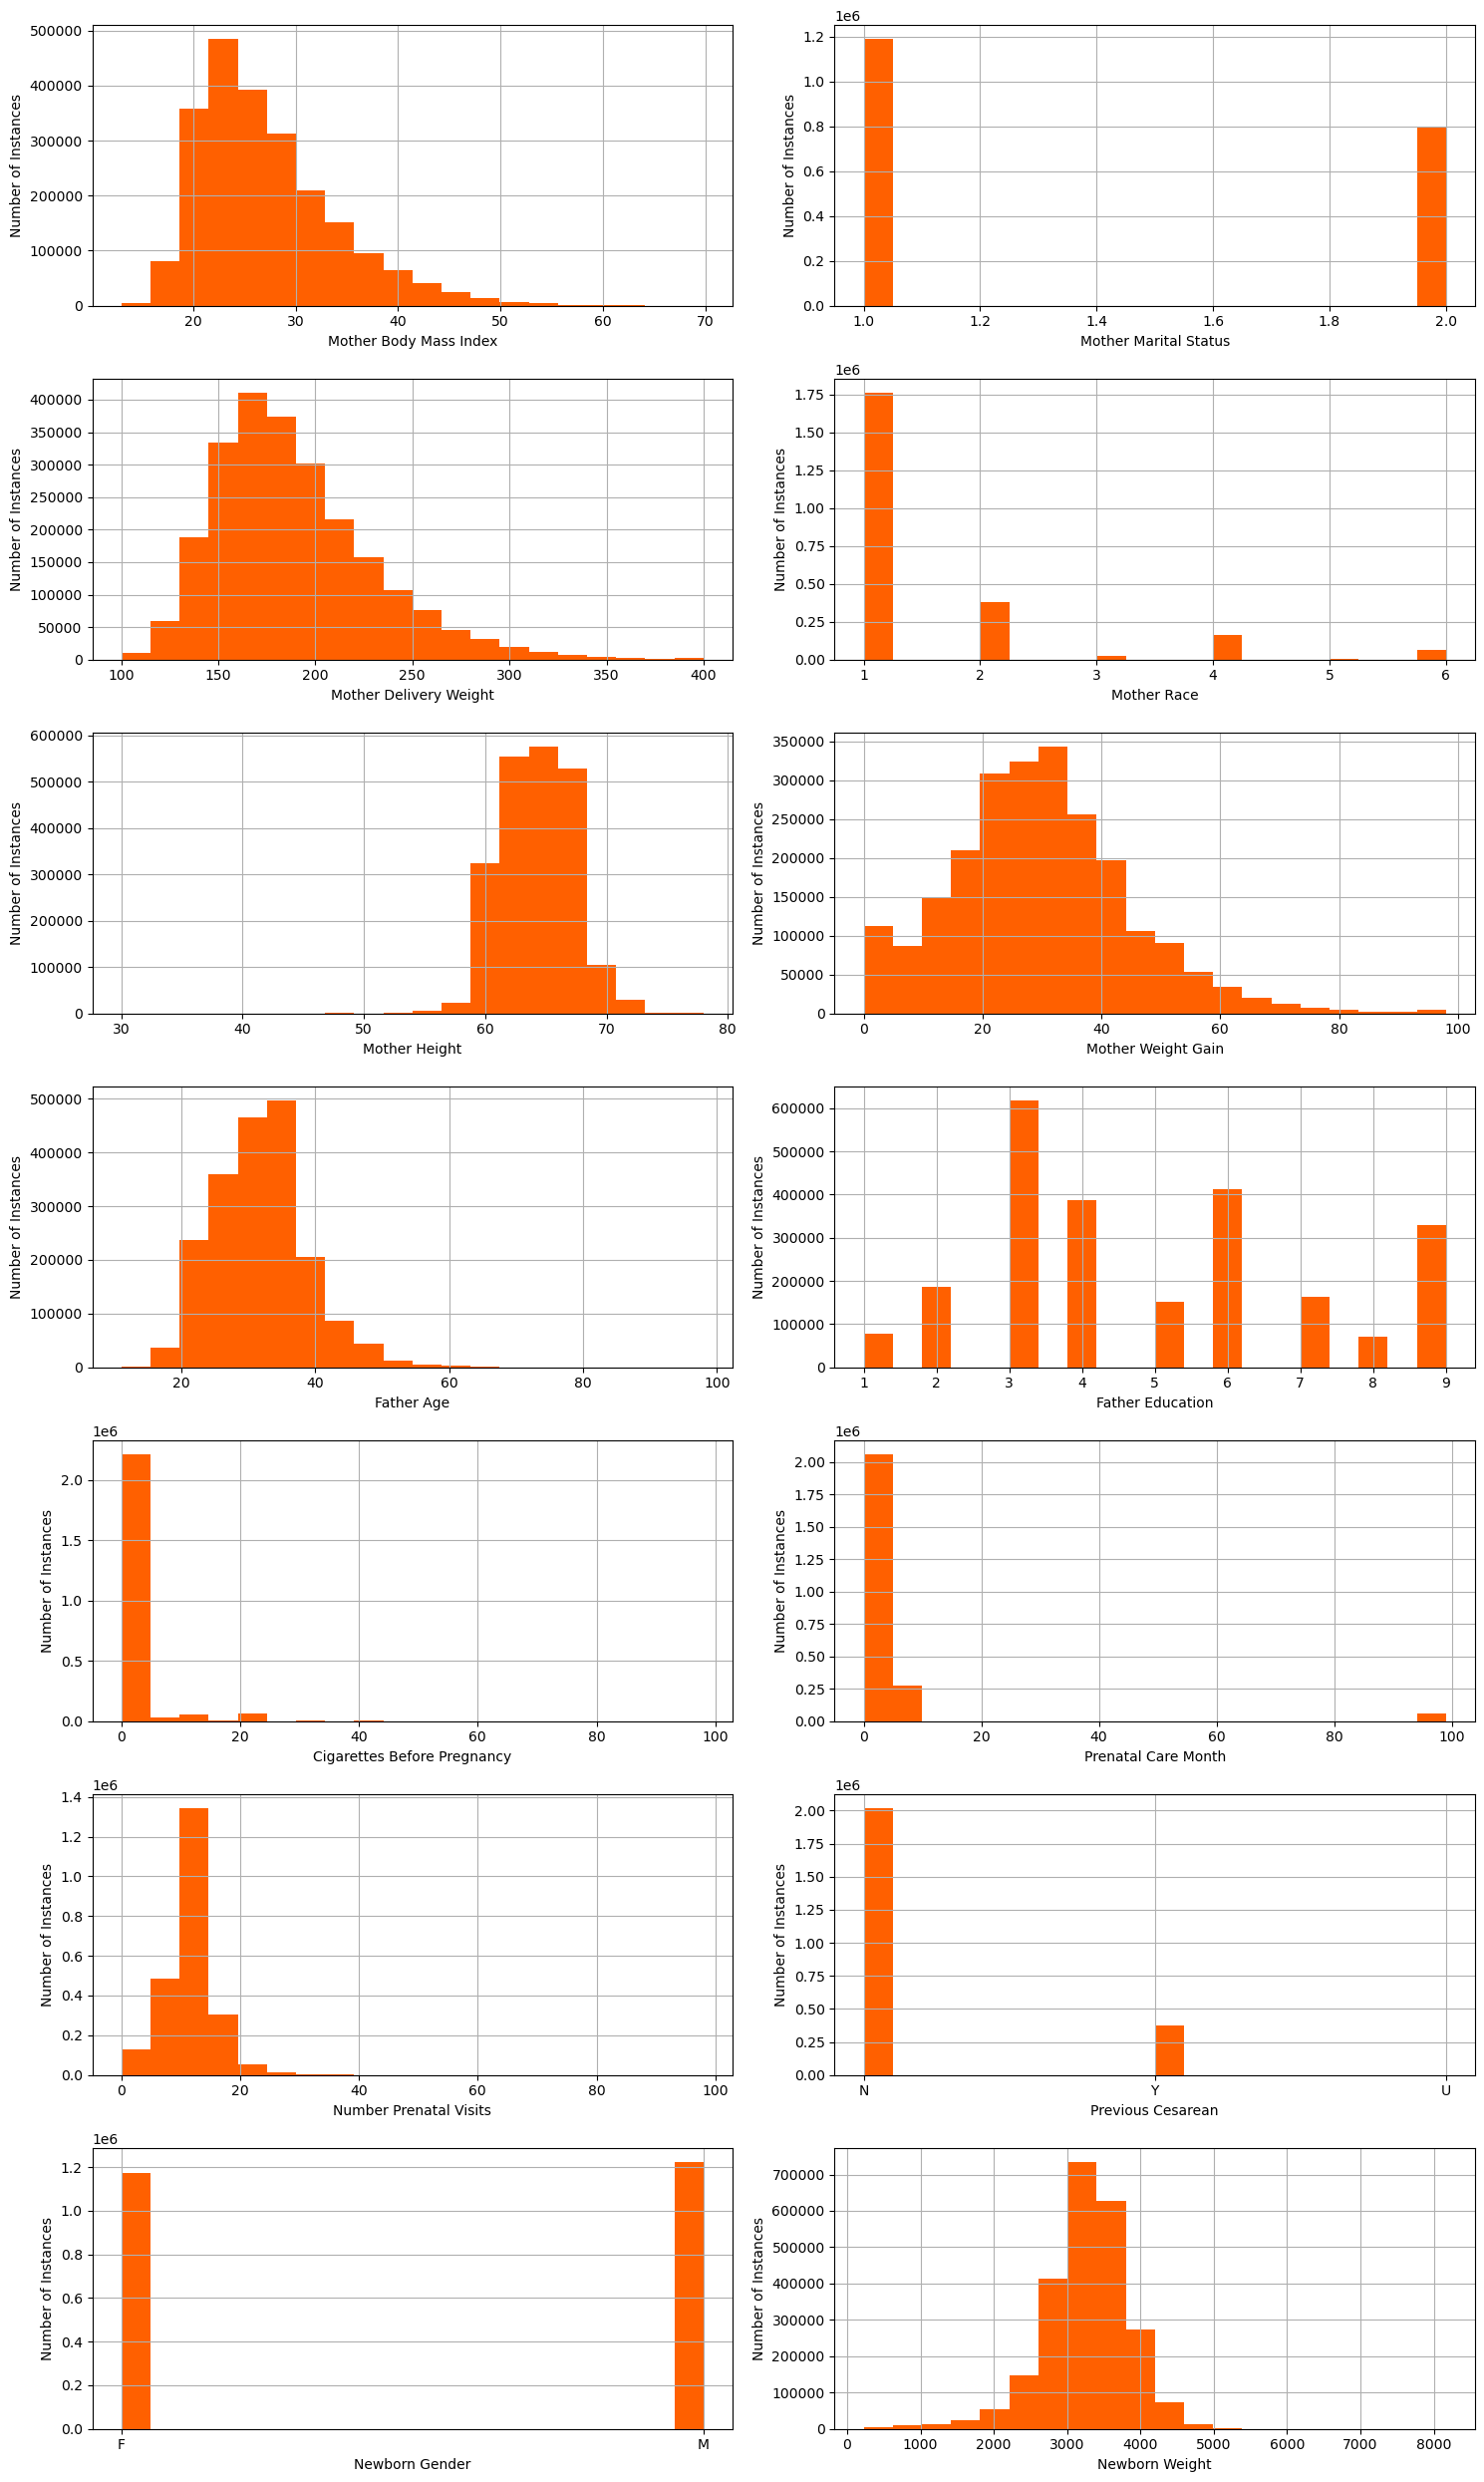

In [12]:
# Create a list of variables to plot
variables = ['mother_body_mass_index', 'mother_marital_status', 'mother_delivery_weight',
             'mother_race', 'mother_height', 'mother_weight_gain', 'father_age',
             'father_education', 'cigarettes_before_pregnancy', 'prenatal_care_month',
             'number_prenatal_visits', 'previous_cesarean', 'newborn_gender', 'newborn_weight']

# Set the number of rows and columns for subplots
rows = 7
cols = 2

# Calculate the total number of subplots
total_subplots = rows * cols

# Set the figure size
plt.figure(figsize=(15, 25))

# Loop through the variables and plot histograms
for i, variable in enumerate(variables):
    # Calculate the subplot position
    subplot_position = i % total_subplots + 1

    # Create the subplot
    plt.subplot(rows, cols, subplot_position)
    fig = train_data[variable].hist(bins=20, color='#FF6000')  # Change color here
    fig.set_xlabel(variable.replace('_', ' ').title())
    fig.set_ylabel('Number of Instances')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

The histogram results indicate the presence of skewness in some variables. Skewness refers to the asymmetry of the data distribution, which can affect the accuracy and reliability of regression models. Skewed data violates the assumptions of linearity, normality, and homoscedasticity, which are crucial for valid regression analysis.

To address this issue, it is necessary to apply data preprocessing methods before applying regression models. These methods aim to reduce skewness and align the data with the assumptions of regression models. Some of the common techniques can be applied such as s removing outliers, winsorizing or trimming extreme values, applying mathematical transformations, and imputing missing values.

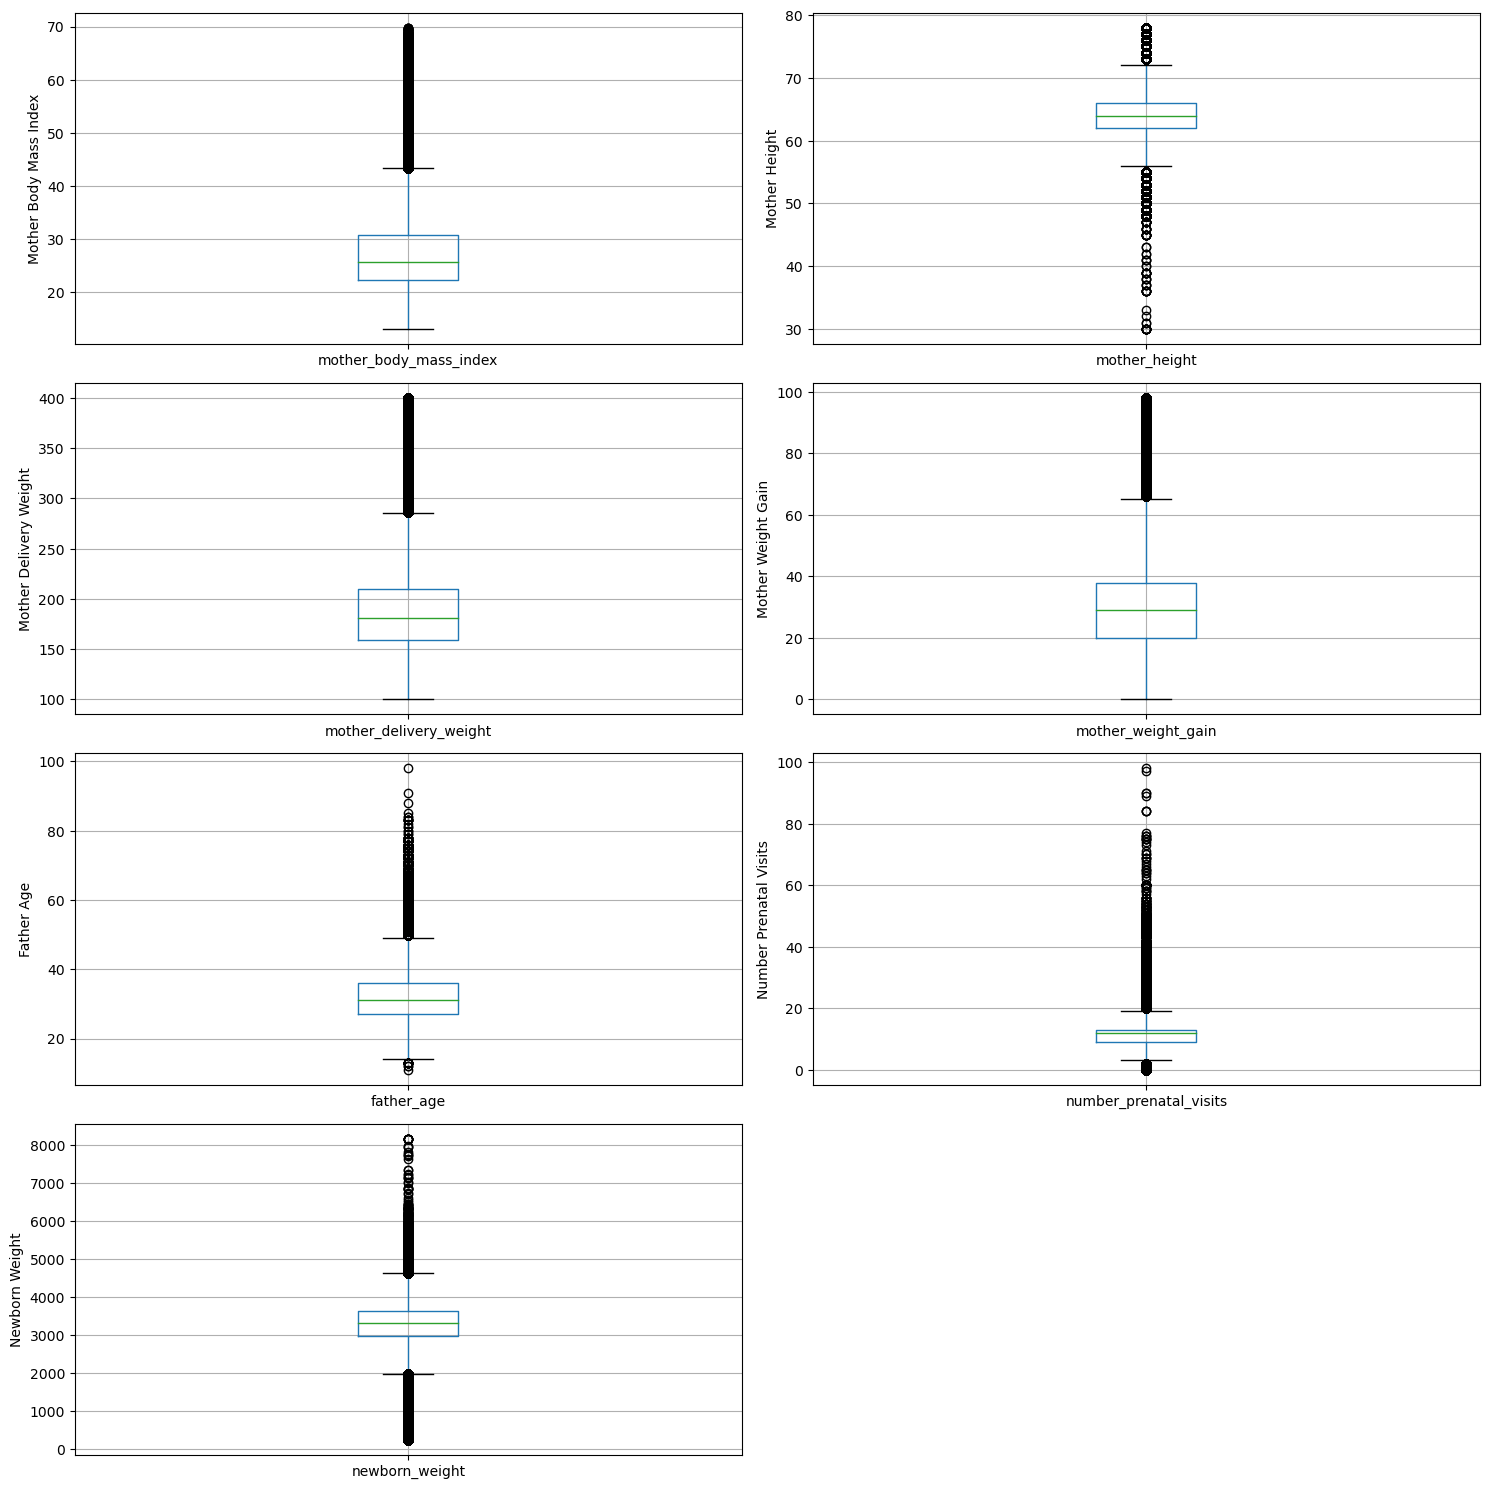

In [88]:
# Create a list of numerical variables for boxplot
numerical_variables = ['mother_body_mass_index', 'mother_height', 'mother_delivery_weight', 'mother_weight_gain',
                       'father_age', 'number_prenatal_visits', 'newborn_weight']

# Set the number of rows and columns for subplots
rows = 4
cols = 2

# Set the figure size
plt.figure(figsize=(15,15))

# Loop through the numerical variables and plot boxplots
for i, variable in enumerate(numerical_variables):
    # Calculate the subplot position
    subplot_position = i + 1

    # Create the subplot
    plt.subplot(rows, cols, subplot_position)
    fig = train_data.boxplot(column=variable)
    fig.set_title('')
    fig.set_ylabel(variable.replace('_', ' ').title())

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


The presence of outliers in some numerical variables, as evident from the boxplot results, can significantly affect the performance and accuracy of regression models. It is crucial to address this issue before applying regression in order to improve the reliability and accuracy of the models. By considering the impact of outliers and implementing appropriate data preprocessing methods, we enhance the robustness and validity of the regression results.

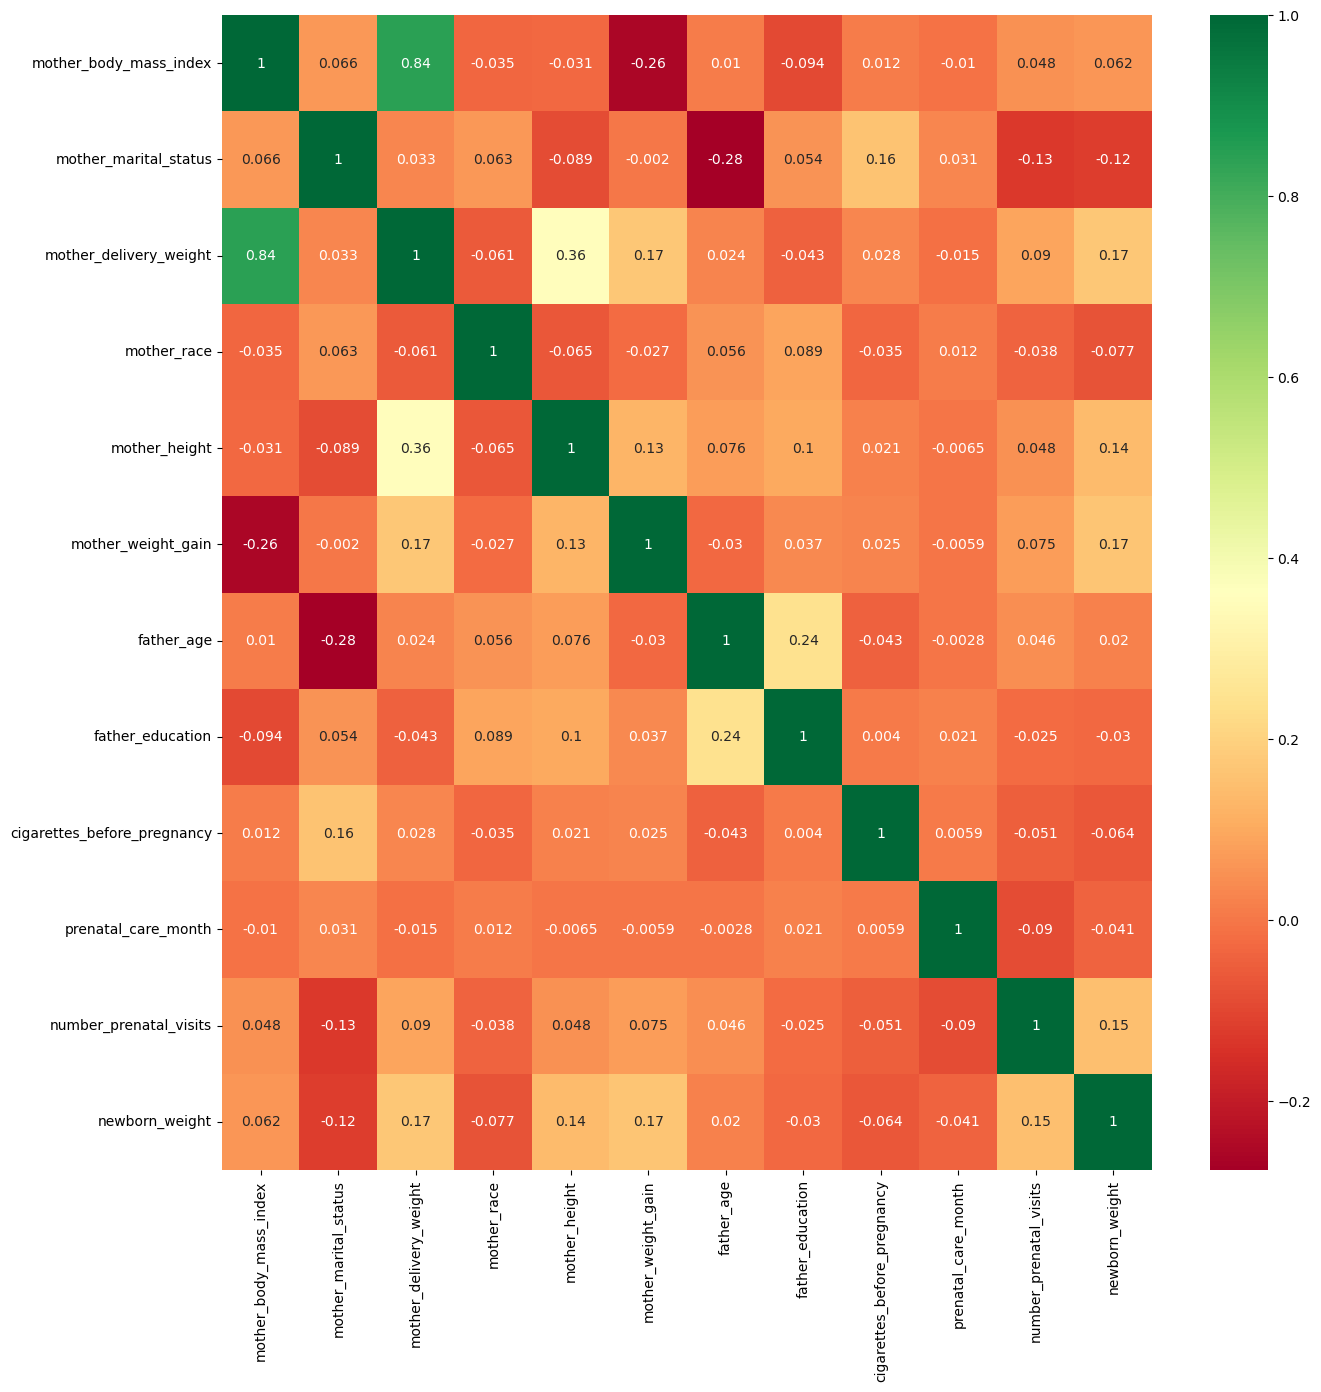

In [89]:
plt.figure(figsize=(15,15))
p=sns.heatmap(train_data.corr(), annot=True,cmap ='RdYlGn') 

Based on the correlation heat map, there is a **high positive linear relationship** (correlation of 0.84) between the variables **mother_delivery_weight** and **mother_body_mass_index**. Additionally, there is a **moderate positive linear relationship** between **mother_delivery_weight** and **mother_height**. These correlations suggest that mother_delivery_weight is highly correlated with both mother_body_mass_index and mother_height.

When applying regression ML models, it is advisable to remove highly correlated variables to avoid multicollinearity issues. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, making it difficult for the model to distinguish the individual effects of these variables on the target variable.

In this case, removing mother_delivery_weight can help mitigate the potential multicollinearity problem. By eliminating this variable, we reduce the overlap in information it shares with mother_body_mass_index and mother_height, allowing the regression models to better capture the unique contributions of each independent variable to the prediction of the target variable.

Removing mother_delivery_weight ensures that the regression models can more accurately assess the impact of other independent variables on the target variable, leading to more reliable and interpretable results.

## DATA PREPROCESSING

### FEATURE SELECTION

In [90]:
# Remove mother_delivery_weight
train_data = train_data.drop('mother_delivery_weight', axis=1)
test_data = test_data.drop('mother_delivery_weight', axis=1)

### CONVERSION

In [91]:
# Convert 'cigarettes_before_pregnancy' into smoker and extreme-smoker categories
train_data['cigarettes_before_pregnancy'] = train_data['cigarettes_before_pregnancy'].replace(98, 'extreme-smoker')
train_data['cigarettes_before_pregnancy'] = train_data['cigarettes_before_pregnancy'].replace(range(0, 98), 'smoker')
test_data['cigarettes_before_pregnancy'] = test_data['cigarettes_before_pregnancy'].replace(98, 'extreme-smoker')
test_data['cigarettes_before_pregnancy'] = test_data['cigarettes_before_pregnancy'].replace(range(0, 98), 'smoker')

### ENCODING

In [92]:
# Encode 'smoker' as 0 and 'extreme-smoker' as 1
train_data['cigarettes_before_pregnancy'] = train_data['cigarettes_before_pregnancy'].map({'smoker': 0, 'extreme-smoker': 1})
test_data['cigarettes_before_pregnancy'] = test_data['cigarettes_before_pregnancy'].map({'smoker': 0, 'extreme-smoker': 1})

# Apply mappings to previous_cesarean column
train_data['newborn_gender'] = train_data['newborn_gender'].map({'F': 0, 'M': 1})
test_data['newborn_gender'] = test_data['newborn_gender'].map({'F': 0, 'M': 1})

# Define a mapping dictionary for ordinal encoding
ordinal_mapping = {'N': 0, 'Y': 1, 'U': 2}

# Apply ordinal encoding to the 'previous_cesarean' column
train_data['previous_cesarean'] = train_data['previous_cesarean'].map(ordinal_mapping)
test_data['previous_cesarean'] = test_data['previous_cesarean'].map(ordinal_mapping)

### REMOVING OUTLIERS & DATA IMPUTATION 

In [93]:
# Define the features for outlier detection
features = ['mother_body_mass_index', 'mother_height', 'mother_weight_gain', 'father_age', 'prenatal_care_month', 'number_prenatal_visits', 'newborn_weight']

# Calculate the IQR for each feature to identify outliers
Q1 = train_data[features].quantile(0.25)
Q3 = train_data[features].quantile(0.75)
IQR = Q3 - Q1

# Determine the threshold for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers and impute null values with median
for feature in features:
    median_value = train_data[feature].median()
    train_data.loc[train_data[feature].isnull() | (train_data[feature] < lower_bound[feature]) | (train_data[feature] > upper_bound[feature]), feature] = median_value

# Create a new category for missing values in mother_marital_status
train_data['mother_marital_status'].fillna(train_data['mother_marital_status'].mode()[0], inplace=True)

# Create a new category for missing values in mother_marital_status
train_data['cigarettes_before_pregnancy'].fillna(train_data['cigarettes_before_pregnancy'].mode()[0], inplace=True)


In [96]:
train_data.isnull().sum()

mother_body_mass_index         0
mother_marital_status          0
mother_race                    0
mother_height                  0
mother_weight_gain             0
father_age                     0
father_education               0
cigarettes_before_pregnancy    0
prenatal_care_month            0
number_prenatal_visits         0
previous_cesarean              0
newborn_gender                 0
newborn_weight                 0
dtype: int64

In [94]:
# Define the features for outlier detection
features = ['mother_body_mass_index', 'mother_height', 'mother_weight_gain', 'father_age', 'prenatal_care_month', 'number_prenatal_visits']

# Calculate the IQR for each feature to identify outliers
Q1 = test_data[features].quantile(0.25)
Q3 = test_data[features].quantile(0.75)
IQR = Q3 - Q1

# Determine the threshold for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers and impute null values with median
for feature in features:
    median_value = test_data[feature].median()
    test_data.loc[test_data[feature].isnull() | (test_data[feature] < lower_bound[feature]) | (test_data[feature] > upper_bound[feature]), feature] = median_value

# Create a new category for missing values in mother_marital_status
test_data['mother_marital_status'].fillna(test_data['mother_marital_status'].mode()[0], inplace=True)

# Create a new category for missing values in mother_marital_status
test_data['cigarettes_before_pregnancy'].fillna(test_data['cigarettes_before_pregnancy'].mode()[0], inplace=True)


In [95]:
test_data.isnull().sum()

mother_body_mass_index         0
mother_marital_status          0
mother_race                    0
mother_height                  0
mother_weight_gain             0
father_age                     0
father_education               0
cigarettes_before_pregnancy    0
prenatal_care_month            0
number_prenatal_visits         0
previous_cesarean              0
newborn_gender                 0
dtype: int64

### SCALING

In [97]:
# Define the features for scaling
train_features = ['mother_body_mass_index', 'mother_height', 'mother_weight_gain', 'father_age', 'number_prenatal_visits']


# Create a scaler and apply scaling
scaler = StandardScaler()
train_data[train_features] = scaler.fit_transform(train_data[train_features])

In [98]:
round(train_data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
mother_body_mass_index,2398116.0,0.00,1.00,-2.44,-0.72,-0.14,0.54,3.04
mother_marital_status,2398116.0,1.33,0.47,1.00,1.00,1.00,2.00,2.00
mother_race,2398116.0,1.52,1.11,1.00,1.00,1.00,2.00,6.00
mother_height,2398116.0,-0.00,1.00,-3.12,-0.81,-0.04,0.73,3.04
mother_weight_gain,2398116.0,-0.00,1.00,-2.13,-0.64,0.03,0.62,2.71
father_age,2398116.0,-0.00,1.00,-3.06,-0.60,-0.07,0.63,3.10
father_education,2398116.0,4.90,2.31,1.00,3.00,4.00,6.00,9.00
cigarettes_before_pregnancy,2398116.0,0.00,0.01,0.00,0.00,0.00,0.00,1.00
prenatal_care_month,2398116.0,2.58,0.73,1.00,2.00,3.00,3.00,4.00
number_prenatal_visits,2398116.0,0.00,1.00,-2.78,-0.43,0.24,0.57,2.58


In [99]:
# Define the features for scaling
test_features = ['mother_body_mass_index', 'mother_height','mother_weight_gain', 'father_age', 'number_prenatal_visits']


# Create a scaler and apply scaling
scaler = StandardScaler()
test_data[test_features] = scaler.fit_transform(test_data[test_features])

In [100]:
round(test_data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
mother_body_mass_index,599561.0,-0.00,1.00,-2.44,-0.72,-0.14,0.55,3.04
mother_marital_status,599561.0,1.33,0.47,1.00,1.00,1.00,2.00,2.00
mother_race,599561.0,1.52,1.11,1.00,1.00,1.00,2.00,6.00
mother_height,599561.0,0.00,1.00,-3.13,-0.81,-0.04,0.73,3.05
mother_weight_gain,599561.0,0.00,1.00,-2.13,-0.64,0.03,0.63,2.71
father_age,599561.0,0.00,1.00,-3.06,-0.60,-0.07,0.63,3.09
father_education,599561.0,4.90,2.30,1.00,3.00,4.00,6.00,9.00
cigarettes_before_pregnancy,599561.0,0.00,0.01,0.00,0.00,0.00,0.00,1.00
prenatal_care_month,599561.0,2.58,0.73,1.00,2.00,3.00,3.00,4.00
number_prenatal_visits,599561.0,0.00,1.00,-2.78,-0.44,0.24,0.57,2.58


### DATA VISUALIZATION AFTER PREPROCESSING

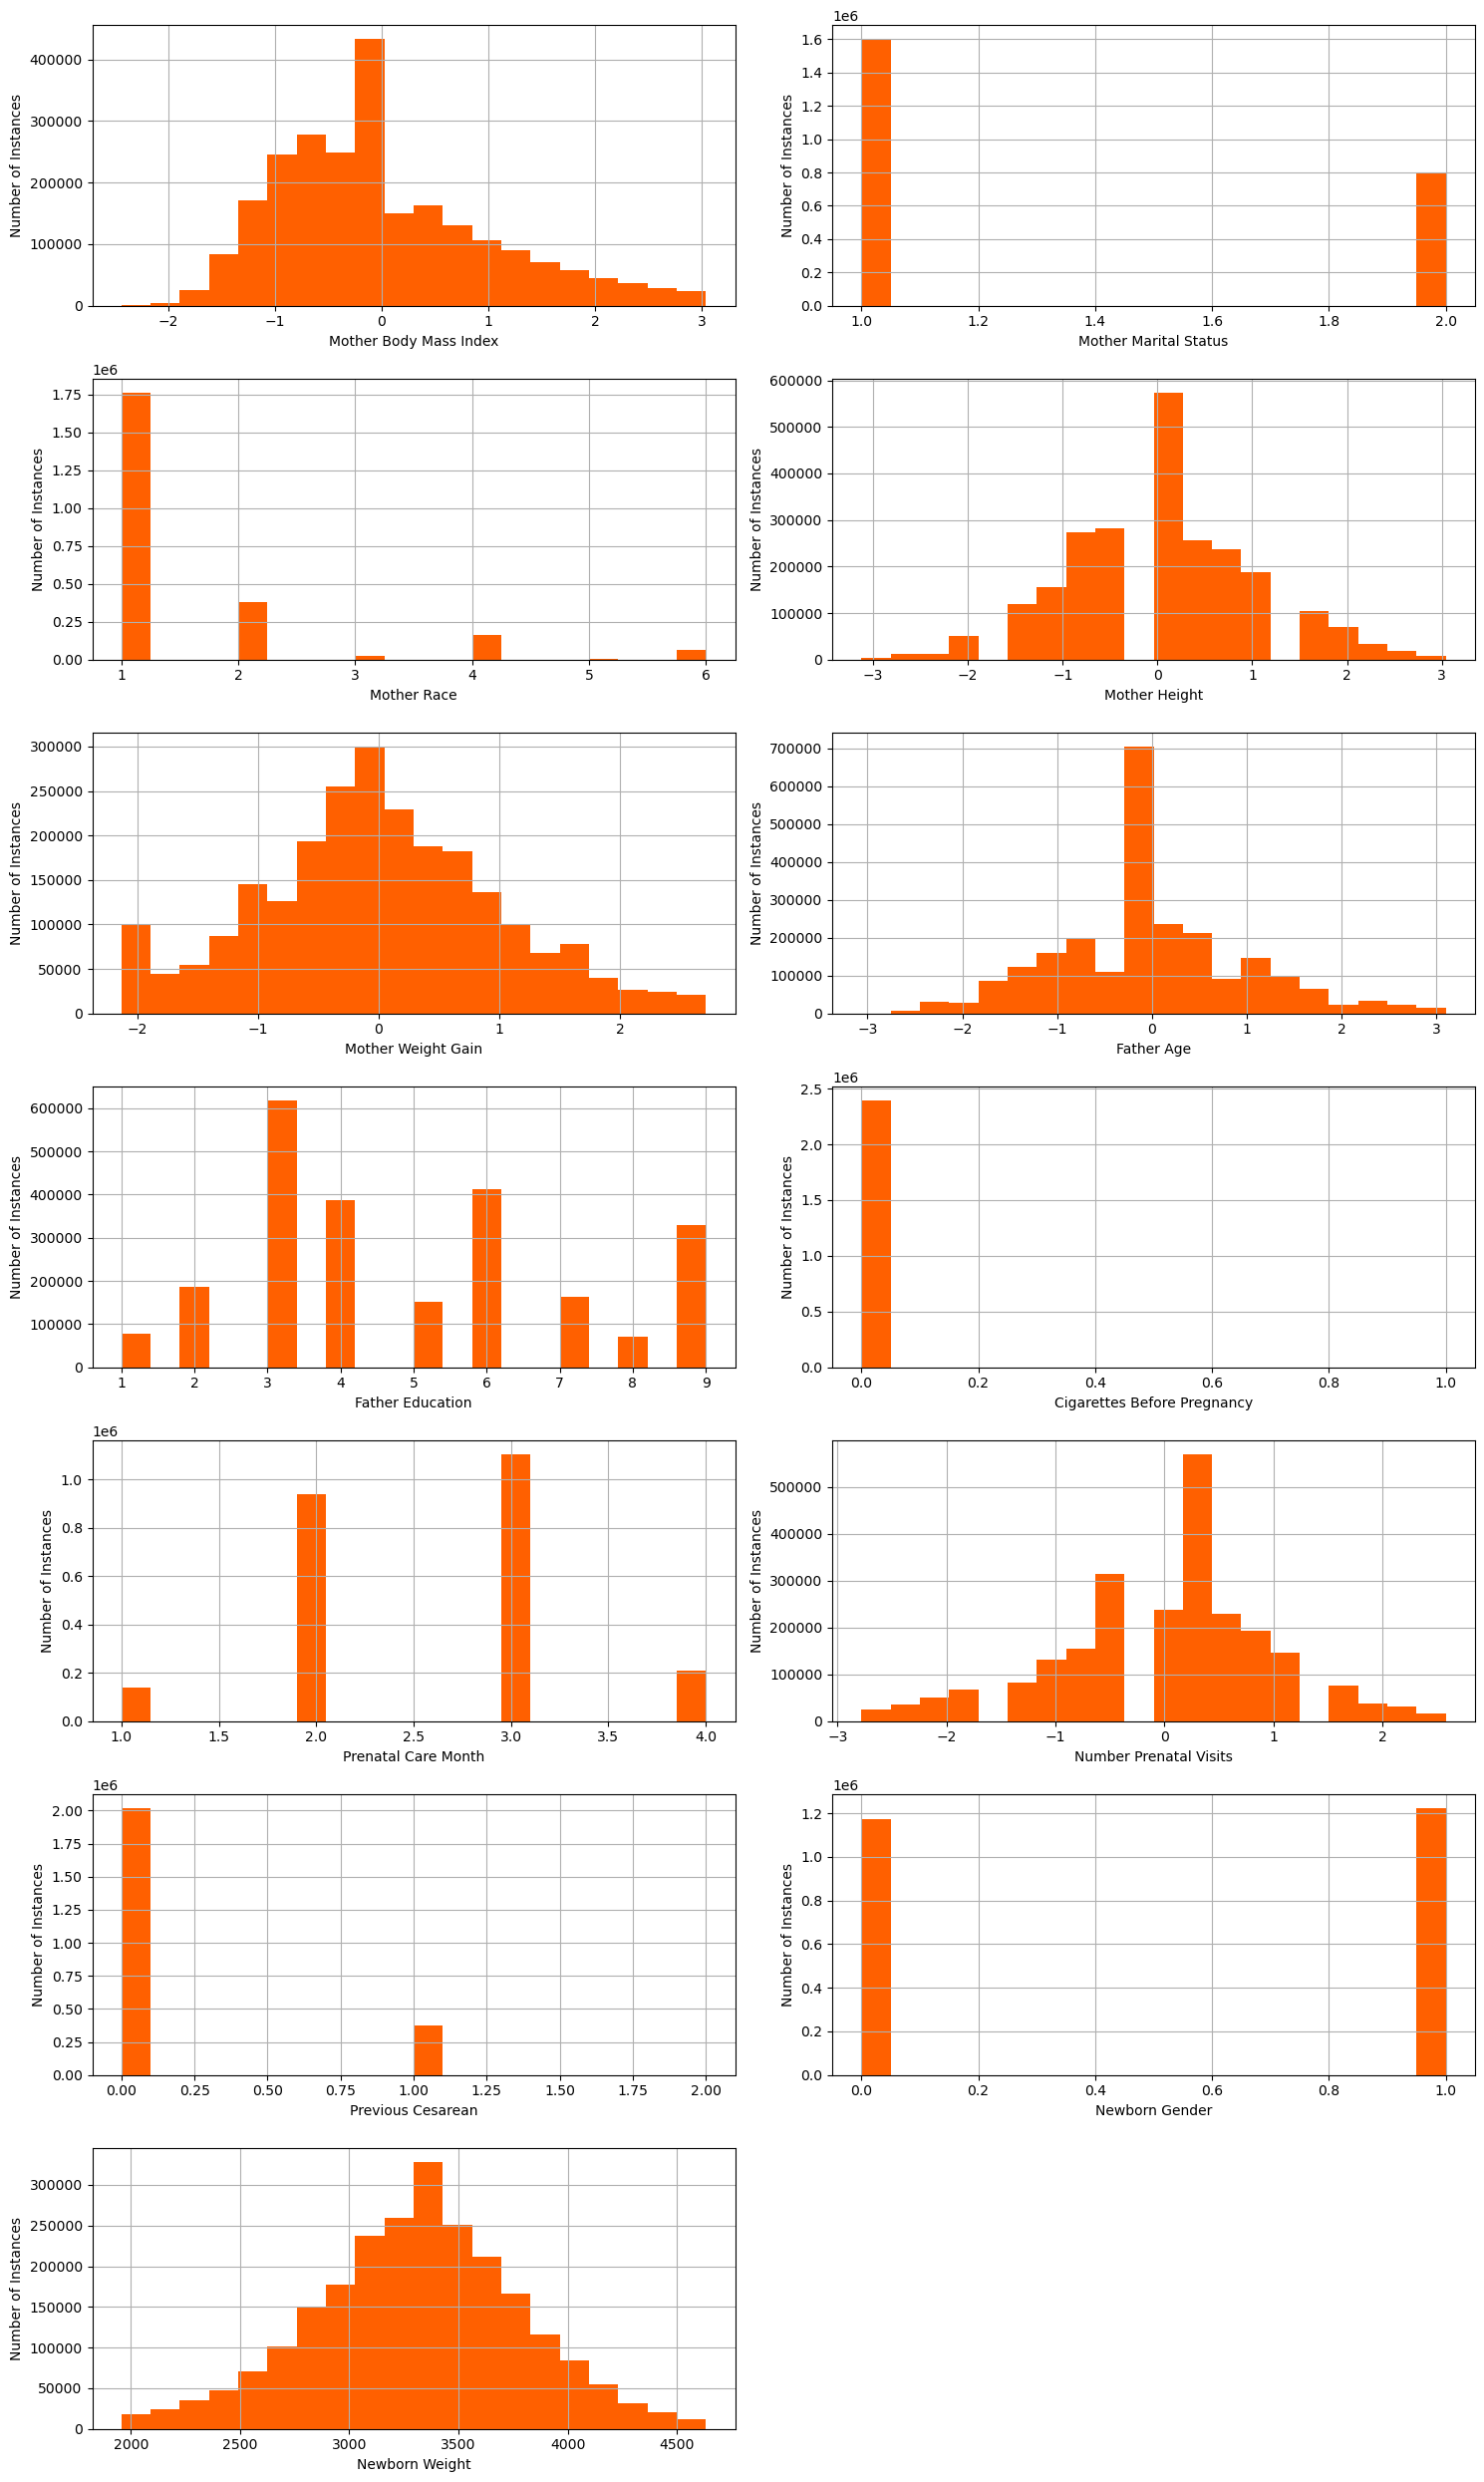

In [50]:
# Create a list of variables to plot
variables = ['mother_body_mass_index', 'mother_marital_status',
             'mother_race', 'mother_height', 'mother_weight_gain', 'father_age',
             'father_education', 'cigarettes_before_pregnancy', 'prenatal_care_month',
             'number_prenatal_visits', 'previous_cesarean', 'newborn_gender', 'newborn_weight']

# Set the number of rows and columns for subplots
rows = 7
cols = 2

# Calculate the total number of subplots
total_subplots = rows * cols

# Set the figure size
plt.figure(figsize=(15, 25))

# Loop through the variables and plot histograms
for i, variable in enumerate(variables):
    # Calculate the subplot position
    subplot_position = i % total_subplots + 1

    # Create the subplot
    plt.subplot(rows, cols, subplot_position)
    fig = train_data[variable].hist(bins=20, color='#FF6000')  # Change color here
    fig.set_xlabel(variable.replace('_', ' ').title())
    fig.set_ylabel('Number of Instances')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

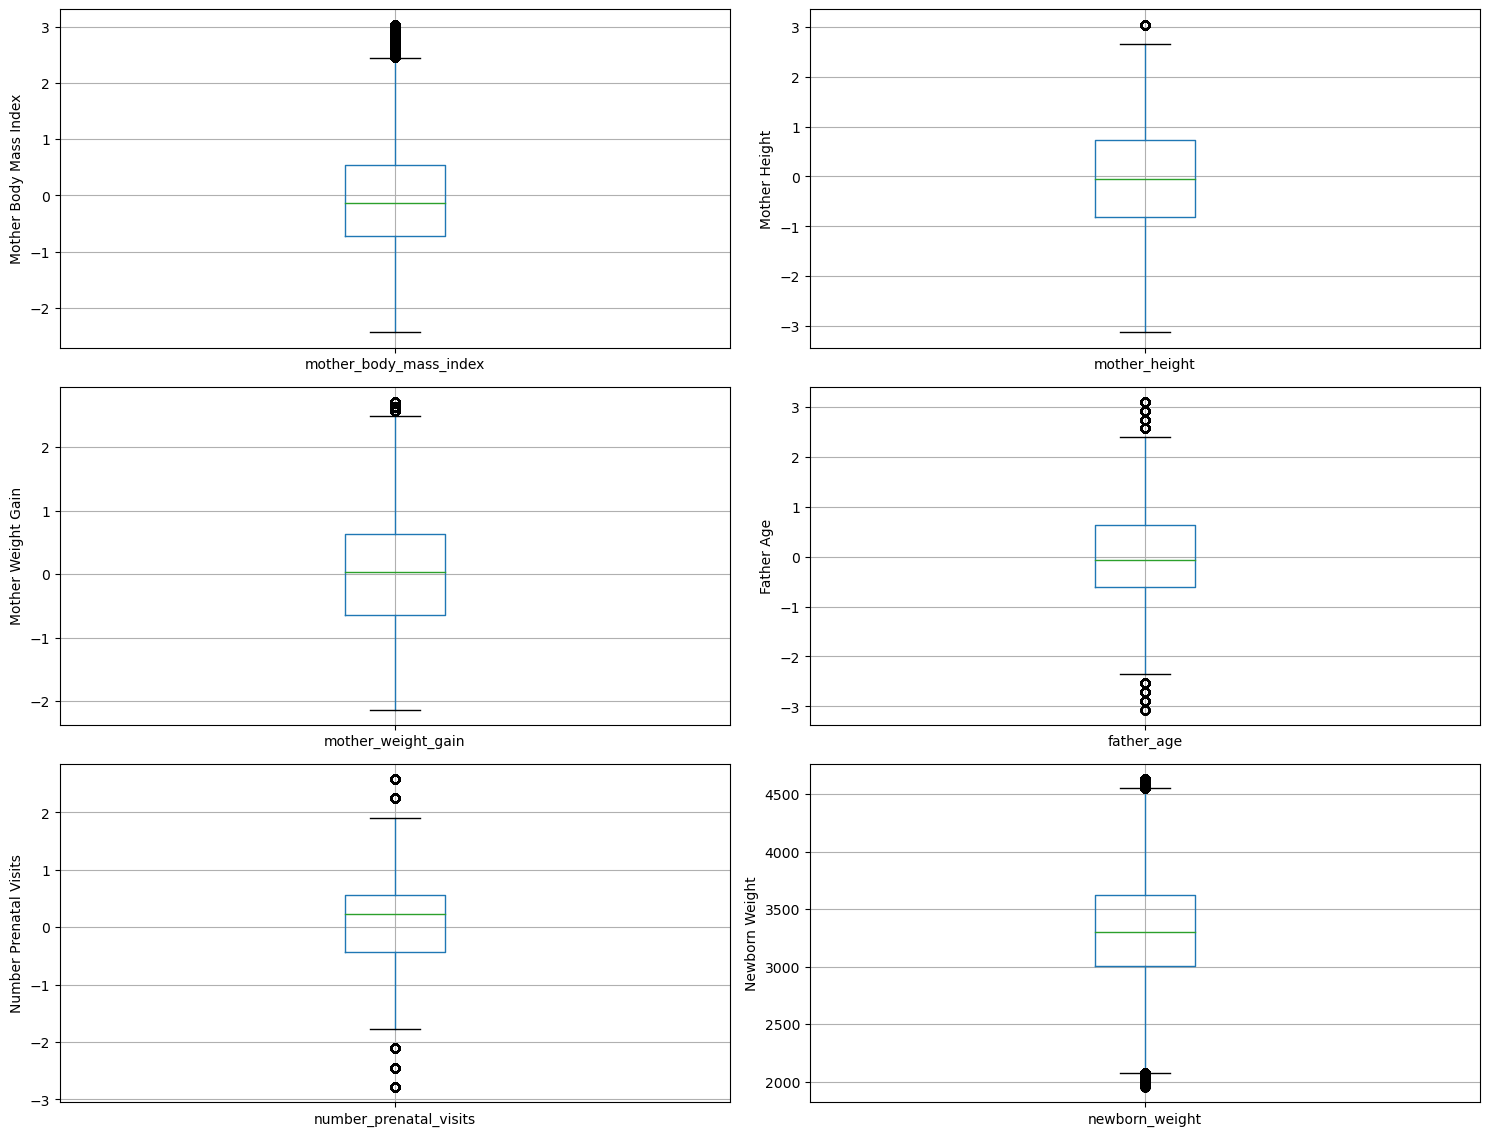

In [101]:
# Create a list of numerical variables for boxplot
numerical_variables = ['mother_body_mass_index', 'mother_height', 'mother_weight_gain',
                       'father_age', 'number_prenatal_visits', 'newborn_weight']

# Set the number of rows and columns for subplots
rows = 4
cols = 2

# Set the figure size
plt.figure(figsize=(15,15))

# Loop through the numerical variables and plot boxplots
for i, variable in enumerate(numerical_variables):
    # Calculate the subplot position
    subplot_position = i + 1

    # Create the subplot
    plt.subplot(rows, cols, subplot_position)
    fig = train_data.boxplot(column=variable)
    fig.set_title('')
    fig.set_ylabel(variable.replace('_', ' ').title())

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


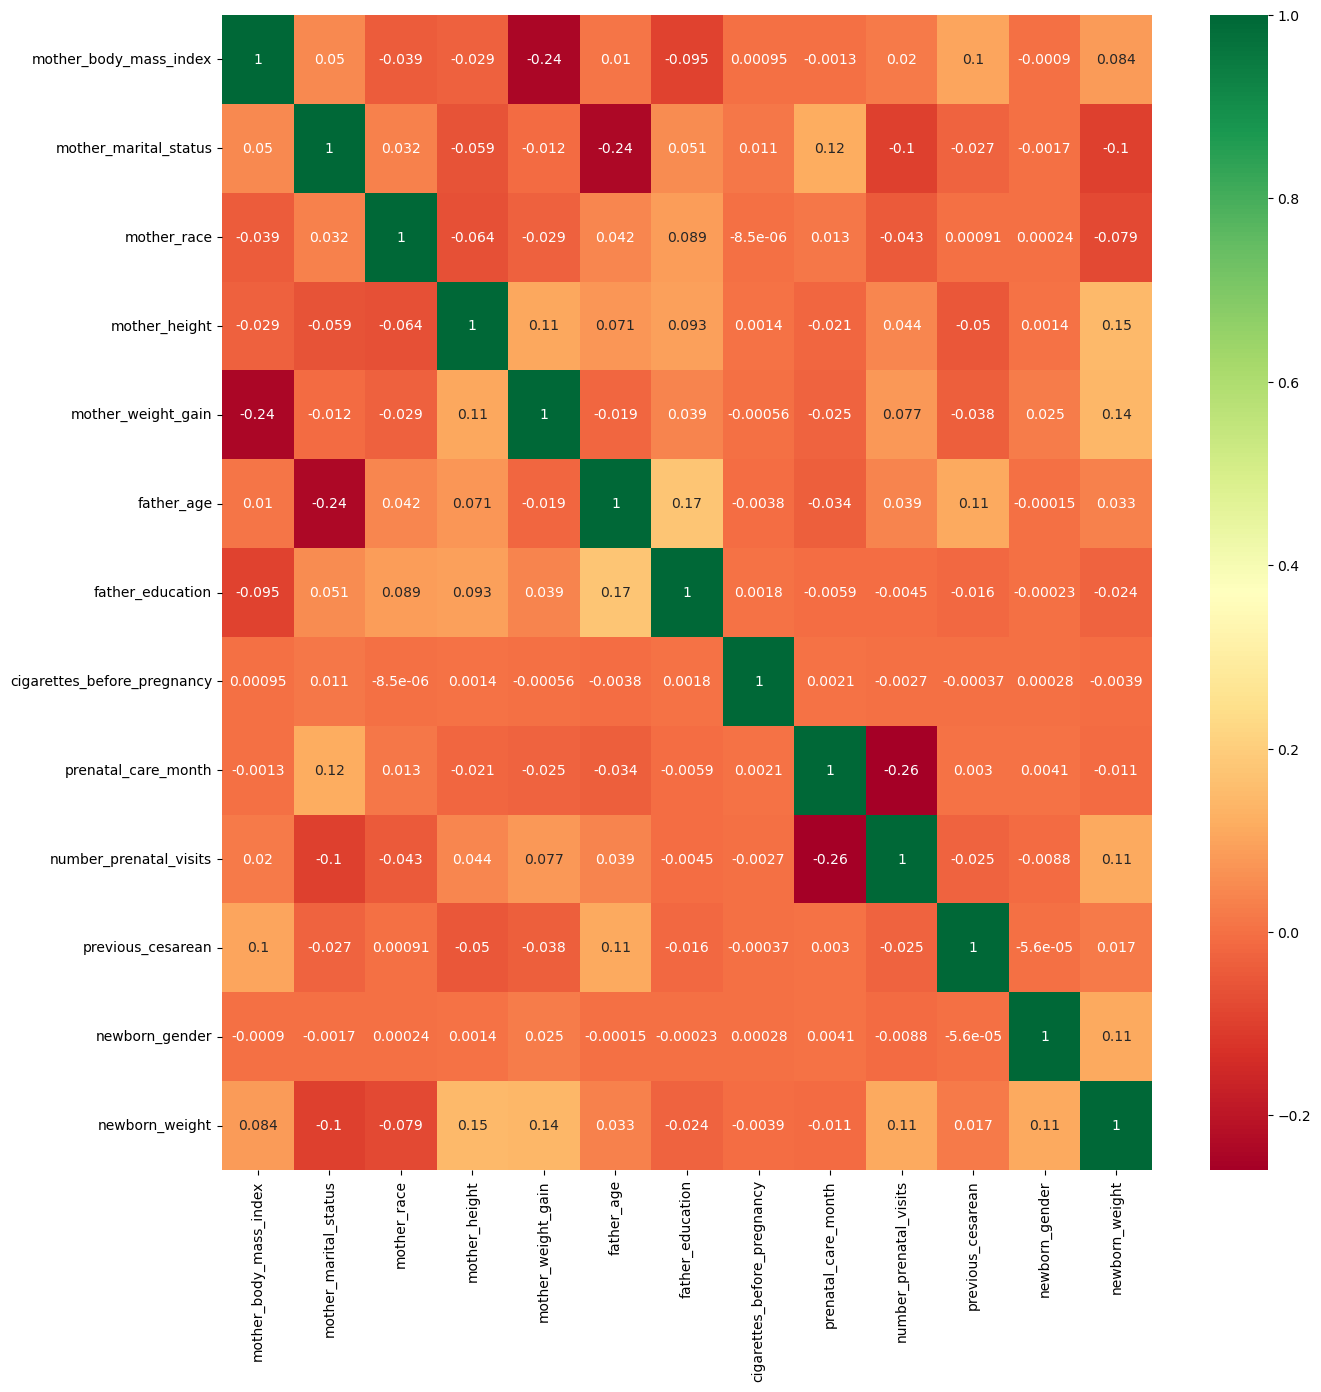

In [102]:
plt.figure(figsize=(15,15))
p=sns.heatmap(train_data.corr(), annot=True,cmap ='RdYlGn') 

## REGRESSION MODELS

We have created five different regression models which were chosen to explore various algorithms for regression analysis.

 * Firstly, we divided the train dataset into two parts: 70% for training and 30% for validation. This split ensured that we had separate datasets to train our models and evaluate their performance.

 * Using the training dataset, we trained each of the models by fitting them to the training features and target values. This allowed the models to learn the underlying patterns and relationships between the features and the target variable.

 * After training the models, we utilized the validation features to make predictions on the corresponding target values. By comparing these predictions with the actual target values in the validation set, we calculated the Mean Absolute Percentage Error (MAPE) to evaluate the accuracy of the models.

 * Additionally, the code includes a step where the trained models were used to predict the target variable for the test dataset. These predictions were saved in separate CSV files for each model.

By following these steps, we were able to assess the performance of different linear regression models, identify the model with the lowest MAPE on the validation set, and obtain predictions for the test dataset.

In [64]:
# Define the features and target variable
features = ['mother_body_mass_index', 'mother_marital_status', 'mother_race', 'mother_height', 'mother_weight_gain',
            'father_age', 'father_education', 'cigarettes_before_pregnancy', 'prenatal_care_month',
            'number_prenatal_visits', 'previous_cesarean', 'newborn_gender']
target = 'newborn_weight'

# Split the data into training and validation sets
train_df, val_df = train_test_split(train_data, test_size=0.3, random_state=42)

# Separate features and target for training, validation, and testing
X_train = train_df[features]
y_train = train_df[target]
X_val = val_df[features]
y_val = val_df[target]
X_test = test_data[features]

# Define the regression algorithms
algorithms = [
    LinearRegression(),
    Ridge(alpha=0.5, random_state=42),
    Lasso(alpha=0.5, random_state=42),
    xgb.XGBRegressor(),
    RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)
]

# Iterate over the algorithms and print the MAPE results
for algorithm in algorithms:
    model_name = algorithm.__class__.__name__
    model = algorithm
    model.fit(X_train, y_train)
    val_predictions = model.predict(X_val)
    mape = mean_absolute_percentage_error(y_val, val_predictions)
    print(f"{model_name} MAPE on validation set: {mape * 100:.2f}%")
    
    # Predict test data and save the predictions as separate CSV files
    test_predictions = model.predict(X_test)
    
    # Create a DataFrame with the predictions
    predictions_df = pd.DataFrame({model_name: test_predictions})
    
    # Save the predictions to a CSV file
    predictions_df.to_csv(f'{model_name}_predictions.csv', index=False)

LinearRegression MAPE on validation set: 11.39%
Ridge MAPE on validation set: 11.39%
Lasso MAPE on validation set: 11.39%
XGBRegressor MAPE on validation set: 11.23%
RandomForestRegressor MAPE on validation set: 11.26%


## CONCLUSION

Based on the given dataset and project description, we aimed to predict the weight of newborns using various maternal and paternal characteristics, as well as prenatal care information. We followed several steps to preprocess the data and applied regression algorithms to build predictive models. The performance of the models was evaluated based on the Mean Absolute Percentage Error (MAPE) for predicting newborn weight.

After removing the highly correlated variable 'mother_delivery_weight' and handling outliers, we encoded categorical variables, imputed missing values, and scaled the relevant features. The dataset was then split into training and validation sets for model evaluation.

We applied five regression algorithms: Linear Regression, Ridge Regression, Lasso Regression, XGBRegressor, and RandomForestRegressor. The MAPE results on the validation set were as follows:


* XGB Regression: 11.23%

* Random Forest Regression: 11.26%

* Linear Regression: 11.39%

* Ridge Regression: 11.39%

* Lasso Regression: 11.39%


Comparing the results, we can observe that the XGBRegressor and RandomForestRegressor models performed slightly better in terms of MAPE, achieving lower errors in predicting newborn weight compared to the linear-based models (Linear Regression, Ridge Regression, and Lasso Regression). This indicates that the ensemble-based models (XGBRegressor and RandomForestRegressor) captured the nonlinear relationships and interactions between the features more effectively.

Overall, the regression models achieved reasonably good performance in predicting newborn weight based on the given dataset and features. However, it is worth noting that there is still room for improvement, as the MAPE values are relatively high. Further optimization and feature engineering could potentially enhance the model's predictive capabilities and reduce the prediction errors.

Due to the large size of the dataset, consisting of more than 2.8 million rows and 14 columns, working with it presented significant challenges. The sheer volume of data exceeded the capacity of conventional computers, particularly in terms of memory (RAM), making it difficult to leverage advanced models and functions. Resource-intensive techniques such as GridSearch and models like Support Vector Machines (SVM) and K-Nearest Neighbors (KNN) were limited by the computational constraints. However, it is important to note that if the data could be processed on a more advanced server-computer setup with higher computational power, it would open up the possibility of applying more sophisticated solutions and potentially yielding even better results. The utilization of advanced hardware infrastructure would allow for the exploration of complex algorithms and computationally intensive techniques, enabling researchers to unlock deeper insights and potentially improve the predictive performance of the models.

In conclusion, this project demonstrates the potential of using regression ML models to predict newborn weight based on maternal and paternal characteristics and prenatal care information. The XGBRegressor and RandomForestRegressor models show promise for achieving more accurate predictions, but further refinement and fine-tuning may be necessary to optimize the models and potentially improve their performance.

